In [11]:
import pandas
import numpy

class DataManager:
    
    def __init__(self, data, sheetName):
        xls = pandas.ExcelFile(data)
        self.df = xls.parse(sheetname=sheetName)
    
    def exportTOcsv(self, outputName, header=True):     
        df2 = self.df.fillna("")
        df2.to_csv(outputName+'.csv', encoding='utf-8', index=False, header=header)
        
    def dropColumns(self, columnsIndex):
        self.df = self.df.drop(self.df.columns[columnsIndex], axis=1)
        
    def dropRows(self, rowsIndex):
        self.df = self.df.drop(self.df[self.df.index[rowsIndex]], axis=0)
    
    def replaceColumnValue(self, columnName, regexString):   
        self.df[columnName] = self.df[columnName].str.replace(regexString, '')
        
    def columnToNumeric(self, columnName):
        self.df[columnName] = pandas.to_numeric(self.df[columnName], errors='coerce').fillna(0).astype(numpy.int64)
    
    def addColumn(self, columnName, columnValues):
        #columnValues is a list [...] containing a certain amount number of values intended to be inserted in the given column 
        self.df[columnName] = columnValues
        
    def getDataframe(self):
        df2 = self.df.fillna("")
        return df2
    

In [12]:
# https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline

dataManager3 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager3.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager3.columnToNumeric("PrevisionnelAnnuel")
dataManager3.columnToNumeric("NbSalaries")

digits = datasets.load_digits()
X=digits.data
y=digits.target

pca = PCA()
# Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
# Décroissance de la variance expliquée

[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

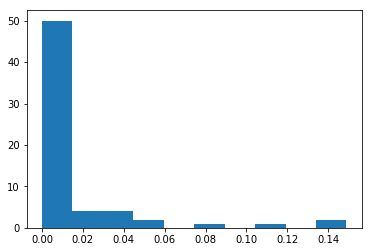

In [13]:
print(pca.explained_variance_ratio_)
plt.hist(pca.explained_variance_ratio_)
somme = 0
for i in range (0, len(pca.explained_variance_ratio_)):
    somme = somme + pca.explained_variance_ratio_[i]
print(somme)

<Strong>
<p>Ici on voit rapidement que les 3 premières valeurs en e-01 sont les plus représentatives de l'informations.</p>
<p>Dans un deuxième temps, on peut aussi utiliser en plus les valeurs en e-02</p>
</Strong>

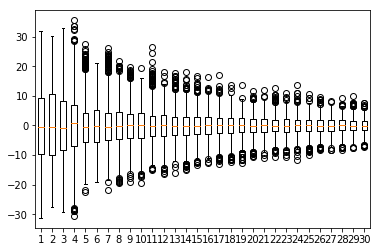

In [14]:
plt.boxplot(C[:,0:30])
plt.show()

<strong><p>
Faire l'analyse du boxplot 
</p></strong>


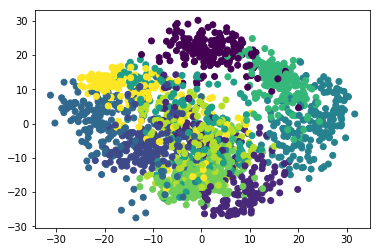

In [15]:
pca1_2 = PCA(n_components = 3)
C = pca1_2.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
plt.show()

<strong><p>
On remarque sur ce graphique 8 groupes plus ou moins distincts.
Ici on a utilisé seulement les 3 premières composantes.
</p></strong>

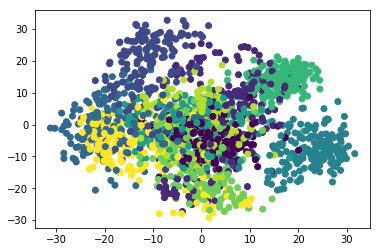

In [16]:
pca1_3 = PCA(n_components = 3)
D = pca1_3.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(D[:,0], D[:,2], c=y, label=target_name)
plt.show()

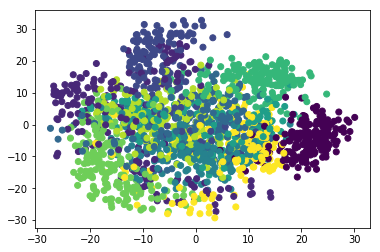

In [17]:
pca2_3 = PCA(n_components = 19)
D = pca2_3.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(D[:,1], D[:,2], c=y, label=target_name)
plt.show()

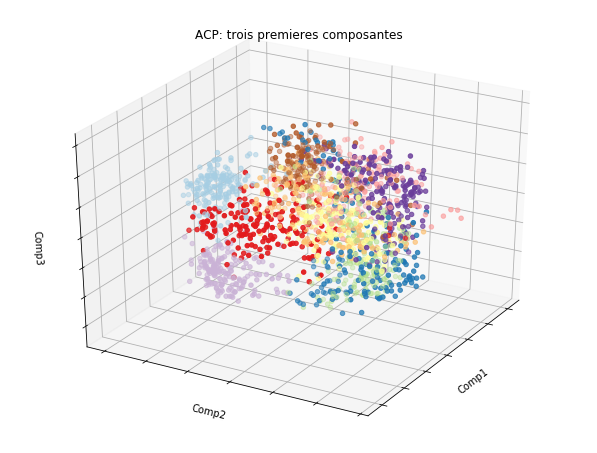

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=150)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c=y,
cmap=plt.cm.Paired)
ax.set_title("ACP: trois premieres composantes")
ax.set_xlabel("Comp1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Comp2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Comp3")
ax.w_zaxis.set_ticklabels([])
plt.show()

<strong><p>
Apprentissage
</p><strong>


In [19]:
dataManager1 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager1.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager1.columnToNumeric("PrevisionnelAnnuel")
dataManager1.columnToNumeric("NbSalaries")
#add a row example
#dataManager1.addColumn("coltest", list(range(1, (dataManager1.getDataframe().shape[0] + 1))))
dataManager1.exportTOcsv("apprentissage", header=False)

dataManager2 = DataManager("Alphaprise.xlsx", "test")
dataManager2.dropColumns([34,35,36,37,38])
dataManager2.exportTOcsv("test", header=False)